<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/PracticeCharNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
mytensor = torch.randn(5, 5).to(device)

i have some ideas i wanna try

In [4]:
mytensor.cpu()

tensor([[ 0.0043,  1.2607,  0.6630, -0.6156,  1.0007],
        [-0.8511,  1.6739,  1.7535, -0.4987,  1.4597],
        [-0.3630,  0.5496, -1.4796,  1.5901, -0.7032],
        [-0.2103,  2.0770,  0.5202,  0.8432,  1.3584],
        [-1.1295, -0.4127, -0.4572,  0.0083, -0.8240]])

In [25]:
class NeuralNet:
  def __init__(self, inputSize=10, hiddenSizes=[400, 200, 300, 100], memorySize=100):
    self.memoryMat = torch.randn(memorySize, memorySize).to(device)
    self.hiddens = [torch.randn(inputSize, hiddenSizes[0]).to(device) / (inputSize ** 0.5)]
    self.biases = [torch.randn(hiddenSizes[0])]
    for last, size in zip(hiddenSizes, hiddenSizes[1:]):
      self.hiddens.append(torch.randn(last, size).to(device) / (last ** 0.5))
      self.biases.append(torch.randn(size).to(device) * 0.01)
  def __call__(self, input):
    print(input.shape)
    out = (input @ self.hiddens[0] + self.biases[0]).tanh()
    print(out.shape)
    for layer, bias in zip(self.hiddens[1:], self.biases[1:]):
      out = (out @ layer + bias).tanh()
    return out

In [26]:
mynet = NeuralNet()

In [27]:
[x.shape for x in mynet.hiddens]

[torch.Size([10, 400]),
 torch.Size([400, 200]),
 torch.Size([200, 300]),
 torch.Size([300, 100])]

In [28]:
mynet(torch.randn(10))

torch.Size([10])
torch.Size([400])


tensor([-1.9521e-01, -8.2675e-02, -5.0028e-01,  2.9120e-01,  5.1278e-01,
        -3.2647e-01,  1.0456e-01,  5.1897e-01, -2.5285e-04,  3.8008e-01,
        -3.9601e-01,  2.2750e-01,  2.6113e-01, -1.6884e-01,  2.4027e-01,
        -3.5230e-01,  1.6925e-01,  2.9720e-02, -1.0637e-01,  2.8572e-01,
        -6.5552e-01,  2.5330e-01, -4.4895e-01, -1.7434e-01,  4.4225e-01,
         3.1894e-01, -3.3036e-01, -4.2942e-01, -7.5340e-03,  2.2133e-01,
        -4.7893e-01,  3.4531e-01, -1.4267e-01, -1.0329e-01, -3.2144e-01,
        -1.2645e-01,  1.4203e-01, -4.6870e-01, -1.5566e-01, -4.0455e-01,
         1.0659e-01,  5.1125e-01,  1.6783e-01, -1.3076e-05, -2.6337e-01,
        -3.4656e-01,  6.5372e-02, -1.7547e-01, -4.6427e-02,  2.6806e-01,
        -3.8358e-01, -3.5891e-01,  2.0830e-01, -2.6575e-01, -4.0849e-01,
        -5.0801e-01,  6.6787e-01, -4.9464e-01,  3.7805e-01,  3.6786e-01,
         2.7629e-01, -2.2515e-01,  2.3027e-01, -2.2633e-01, -1.1566e-01,
         4.3609e-01,  5.0431e-01,  4.1383e-01,  6.2

torch.Size([10])
torch.Size([400])


(array([ 5.,  8.,  8., 14., 11., 16., 15., 12.,  6.,  5.]),
 array([-0.74179101, -0.58539677, -0.42900246, -0.27260819, -0.11621392,
         0.04018036,  0.19657463,  0.3529689 ,  0.50936317,  0.66575742,
         0.82215172]),
 <BarContainer object of 10 artists>)

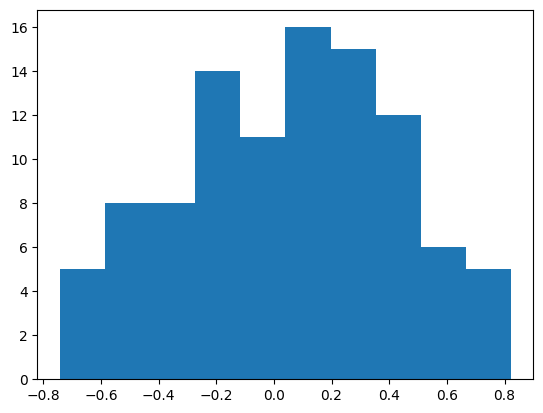

In [29]:
import matplotlib.pyplot as plt

plt.hist(mynet(torch.randn(10).to(device)).cpu().flatten().numpy())

ok watch this

In [30]:
my_dataset = "skibidi"
vocab = ["."] + sorted(list(set(my_dataset)))
stoi = {char:i for i, char in enumerate(vocab)}
itos = {i:char for i, char in enumerate(vocab)}


In [33]:
stoi["."]

0

In [34]:
itos[0]

'.'

In [ ]:
def make_dataset(text, context_len):
  xs, ys = [], []
  context = [0] * context_len
  splitwords = text.split()
  for word in splitwords:
    word = "." + word + "."
    for last, char in zip(word, word[1:]):
      context = context[1:] + stoi[last]
      xs.append(context)
      ys.append(stoi[char])